In [5]:
!pip install umap-learn | grep -v "Requirement already satisfied"

In [20]:
import nltk
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from umap import umap_ as umap

In [9]:
filepath = "/kaggle/input/consumer-review-of-clothing-product/Consumer Review of Clothing Product/data_amazon.xlsx - Sheet1.csv"

df = pd.read_csv(filepath)

display(df)

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
49333,Dress felt and fit great. I got lots of compl...,Loved the color!!! Dress fit great and I got ...,5.0,Dresses,0.0,0.0,1.0,0.0,0.0
49334,Loved the dress but poor quality,This dress looked great and I loved the materi...,2.0,Dresses,1.0,0.0,0.0,0.0,1.0
49335,"Cute dress, didn't fit",Wanted this dress to work it didn't. It is ver...,1.0,Dresses,0.0,1.0,0.0,0.0,0.0
49336,Very cute!,No complaints othe than the zipper gets stuck ...,4.0,Dresses,0.0,0.0,0.0,0.0,1.0


In [10]:
nulls = pd.DataFrame(df.isnull().sum(), columns = ['Nulls'])

display(nulls.T)

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
Nulls,3968,831,214,16,43597,43595,43596,43601,43604


In [13]:
clean_df = df.dropna(subset = ['Title', 'Review']).drop(columns = ['Materials', 'Construction', 'Color', 'Finishing', 'Durability'])

display(clean_df)

,Title,Review,Cons_rating,Cloth_class
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2.0,Dresses
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5.0,Knits
...,...,...,...,...
49333,Dress felt and fit great. I got lots of compl...,Loved the color!!! Dress fit great and I got ...,5.0,Dresses
49334,Loved the dress but poor quality,This dress looked great and I loved the materi...,2.0,Dresses
49335,"Cute dress, didn't fit",Wanted this dress to work it didn't. It is ver...,1.0,Dresses
49336,Very cute!,No complaints othe than the zipper gets stuck ...,4.0,Dresses


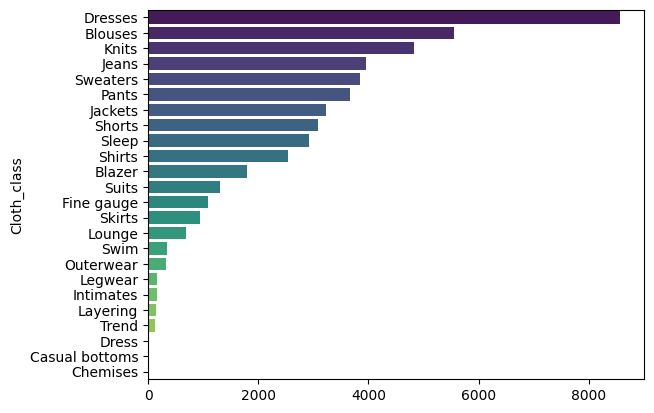

In [19]:
classes = df['Cloth_class'].value_counts()

sns.barplot(y = classes.index, x = classes.values, palette = 'viridis', orient = 'h')

plt.show()

In [56]:
def text_feature_extract(text_feature, model):
    text = model.fit_transform(text_feature)
        
    return text

In [25]:
stopwords = nltk.corpus.stopwords.words("english")

In [46]:
count_vect0 = CountVectorizer(stop_words = stopwords)

In [65]:
%%time

text_title = text_feature_extract(clean_df['Title'], count_vect0)

CPU times: user 463 ms, sys: 3.82 ms, total: 467 ms
Wall time: 467 ms


In [58]:
%%time

text_review = text_feature_extract(clean_df['Review'], count_vect0)

CPU times: user 2.19 s, sys: 6.22 ms, total: 2.2 s
Wall time: 2.19 s


In [71]:
tfidf_vect0 = TfidfVectorizer(stop_words = stopwords, min_df = 4)

In [72]:
%%time

text_title = text_feature_extract(clean_df['Title'], tfidf_vect0)

CPU times: user 456 ms, sys: 1.81 ms, total: 458 ms
Wall time: 457 ms


In [73]:
%%time

text_review = text_feature_extract(clean_df['Review'], tfidf_vect0)

CPU times: user 2.21 s, sys: 3.3 ms, total: 2.22 s
Wall time: 2.22 s


In [76]:
%%time

text_all = text_feature_extract(clean_df['Title'] + ' ' + clean_df['Review'], tfidf_vect0)

CPU times: user 2.47 s, sys: 11.4 ms, total: 2.48 s
Wall time: 2.48 s


In [87]:
inertias = list()
ranges = list(range(3, 12))

kmeans_models = dict()

for n in ranges:
    kmeans = KMeans(n_clusters = n, n_init = 14)
    
    kmeans.fit(text_all)
    
    inertias.append(kmeans.inertia_)
    
    kmeans_models[n] = kmeans

1min 14s ± 2.52 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [88]:
sns.lineplot(x = ranges, y = inertias, marker = 'x', color = 'Green')

plt.show()

ValueError: All arrays must be of the same length

In [ ]:
def redefine_class(x):
    if x in {'Legwear', 'Casual Bottoms', 't'}: return 'Pants'
    elif x in {'Layering', ''}: return ''
    elif x in {'Suits'}: return 'Blazer'
    elif x in {'Intimates'}: return 'Sleep'
    elif x in {'Skirts', 'Dress'}: return 'Dresses'
    elif x in {'Fine gauge'}: return 'Knits'
    else: return x